# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
!pip install citipy

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [19]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

656

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [20]:
#set base url
base_url = f'http://api.openweathermap.org/data/2.5/weather?'


In [22]:
#cities=['paris', 'rome', 'berlin', 'new york', 'boston', 'chicago']
#dataframe
df_weather = pd.DataFrame()
df_weather['City'] = ''
df_weather['Lat'] = ''
df_weather['Lng'] = ''
df_weather['Max Temp'] = ''
df_weather['Humidity'] = ''
df_weather['Cloudiness'] = ''
df_weather['Wind Speed'] = ''
df_weather['Country'] = ''
df_weather['Date'] = ''
#make api call. run loop to save dataframe to local, get data from local only
#put the breaks on my loop to keep from too many calls.  Originaly set to 600
max_records = -1

i = 0

for city in cities:
    if i > max_records:
        break
    url = f'{base_url}q={city}&appid={weather_api_key}&units=imperial'
    
    try:
        response = requests.get(url).json()
        df_weather.loc[i, 'City'] = city
        df_weather.loc[i, 'Lat'] = response['coord']['lat']
        df_weather.loc[i, 'Lng'] = response['coord']['lon']
        df_weather.loc[i, 'Max Temp'] = response['main']['temp_max']
        df_weather.loc[i, 'Humidity'] = response['main']['humidity']
        df_weather.loc[i, 'Cloudiness'] = response['clouds']['all']
        df_weather.loc[i, 'Wind Speed'] = response['wind']['speed']
        df_weather.loc[i, 'Country'] = response['sys']['country']
        df_weather.loc[i, 'Date'] = response['dt']
       
    except:
        print(f'{city} not found')
    i = i + 1

#Export the city data into a csv.
if len(df_weather) > 1:
    df_weather.to_csv('df_weather.csv', index=False)
df_weather=pd.read_csv('df_weather.csv')
len(df_weather)

601

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [42]:
df_weather

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.74,-90.35,77.00,61.0,20.0,21.92,EC,1.605477e+09
1,talnakh,69.49,88.40,10.40,92.0,75.0,6.71,RU,1.605477e+09
2,coquimbo,-29.95,-71.34,59.00,67.0,75.0,11.41,CL,1.605477e+09
3,yunyang,33.45,112.71,51.33,80.0,0.0,5.61,CN,1.605477e+09
4,mount gambier,-37.83,140.77,59.00,72.0,75.0,24.16,AU,1.605477e+09
...,...,...,...,...,...,...,...,...,...
596,vaitupu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597,macaboboni,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
598,bilma,18.69,12.92,66.96,32.0,65.0,1.59,NE,1.605477e+09
599,ariquemes,-9.91,-63.04,83.97,67.0,63.0,2.04,BR,1.605477e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [43]:
df_low_humid = df_weather.loc[df_weather['Humidity'] < 100]
df_low_humid

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.74,-90.35,77.00,61.0,20.0,21.92,EC,1.605477e+09
1,talnakh,69.49,88.40,10.40,92.0,75.0,6.71,RU,1.605477e+09
2,coquimbo,-29.95,-71.34,59.00,67.0,75.0,11.41,CL,1.605477e+09
3,yunyang,33.45,112.71,51.33,80.0,0.0,5.61,CN,1.605477e+09
4,mount gambier,-37.83,140.77,59.00,72.0,75.0,24.16,AU,1.605477e+09
...,...,...,...,...,...,...,...,...,...
594,broken hill,-31.95,141.43,66.20,45.0,89.0,19.46,AU,1.605477e+09
595,houston,29.76,-95.36,75.00,13.0,1.0,13.87,US,1.605476e+09
598,bilma,18.69,12.92,66.96,32.0,65.0,1.59,NE,1.605477e+09
599,ariquemes,-9.91,-63.04,83.97,67.0,63.0,2.04,BR,1.605477e+09


In [44]:
#  Get the indices of cities that have humidity over 100%.
df_humid = df_weather.loc[df_weather['Humidity'] >= 100]
df_humid.index

Int64Index([57, 87, 304, 478, 496], dtype='int64')

In [45]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
df_clean = df_weather.drop(df_humid.index, inplace=False)
df_clean

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.74,-90.35,77.00,61.0,20.0,21.92,EC,1.605477e+09
1,talnakh,69.49,88.40,10.40,92.0,75.0,6.71,RU,1.605477e+09
2,coquimbo,-29.95,-71.34,59.00,67.0,75.0,11.41,CL,1.605477e+09
3,yunyang,33.45,112.71,51.33,80.0,0.0,5.61,CN,1.605477e+09
4,mount gambier,-37.83,140.77,59.00,72.0,75.0,24.16,AU,1.605477e+09
...,...,...,...,...,...,...,...,...,...
596,vaitupu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597,macaboboni,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
598,bilma,18.69,12.92,66.96,32.0,65.0,1.59,NE,1.605477e+09
599,ariquemes,-9.91,-63.04,83.97,67.0,63.0,2.04,BR,1.605477e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

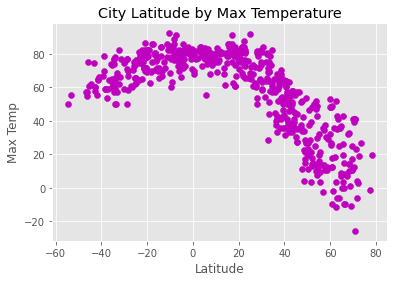

In [51]:
#create plot
df = df_clean
#df = df_clean[df_clean['Date'] == '1.605477e+09']
plt.scatter(df['Lat'], df['Max Temp'], c='m' )
#format plot    
plt.style.use('ggplot')   
plt.title('City Latitude by Max Temperature')
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.show()


## Latitude vs. Humidity Plot

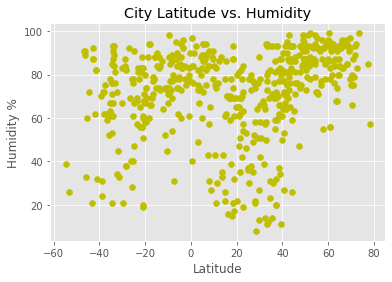

In [52]:
#create plot
df = df_clean
#df = df_clean[df_clean['Date'] == '1.605477e+09']
plt.scatter(df['Lat'], df['Humidity'], c='y' )
#format plot    
plt.style.use('ggplot')   
plt.title('City Latitude vs. Humidity')
plt.ylabel('Humidity %')
plt.xlabel('Latitude')
plt.show()


## Latitude vs. Cloudiness Plot

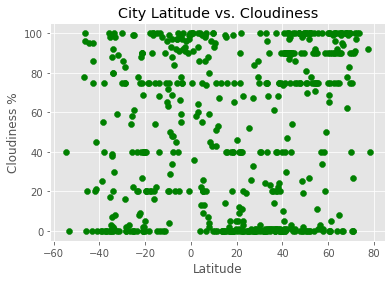

In [53]:
#create plot
df = df_clean
#df = df_clean[df_clean['Date'] == '1.605477e+09']
plt.scatter(df['Lat'], df['Cloudiness'], c='g' )
#format plot    
plt.style.use('ggplot')   
plt.title('City Latitude vs. Cloudiness')
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')
plt.show()

## Latitude vs. Wind Speed Plot

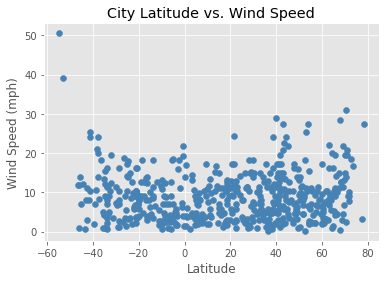

In [54]:
#create plot
df = df_clean
#df = df_clean[df_clean['Date'] == '1.605477e+09']
plt.scatter(df['Lat'], df['Wind Speed'], c='steelblue' )
#format plot    
plt.style.use('ggplot')   
plt.title('City Latitude vs. Wind Speed')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.show()

## Linear Regression

In [67]:
#set up north and south hemisphear
df = df_clean
north_df = df[df['Lat'] > 0]
south_df = df[df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7250020584639353


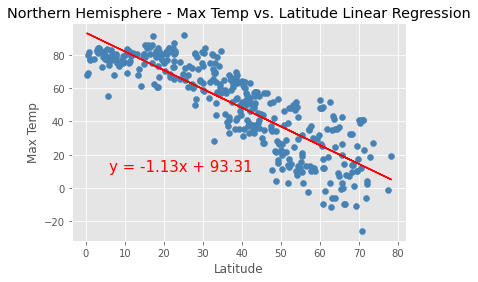

In [82]:
#Linear regression model
df = north_df
x_values = df['Lat']
y_values = df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.style.use('ggplot')  
plt.scatter(x_values,y_values, color='steelblue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4306418130256287


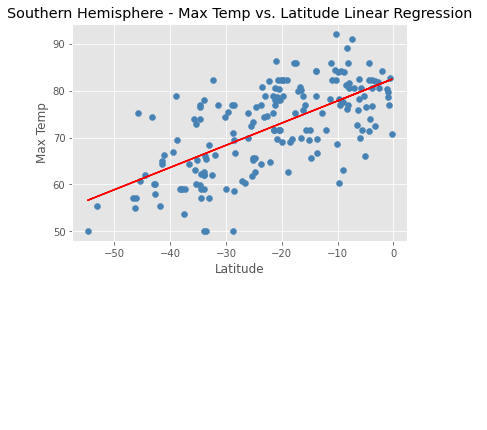

In [88]:
#Linear regression model
df = south_df
x_values = df['Lat']
y_values = df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.style.use('ggplot')  
plt.scatter(x_values,y_values, color = 'steelblue')
plt.plot(x_values,regress_values,"r-")
plt.annotate('line_eq',(6,10),fontsize=15,color="red")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.12010846292396724


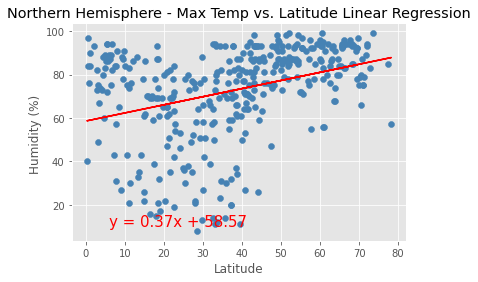

In [84]:
#Linear regression model
df = north_df
x_values = df['Lat']
y_values = df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.style.use('ggplot')  
plt.scatter(x_values,y_values, color='steelblue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%) ')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08310140408486152


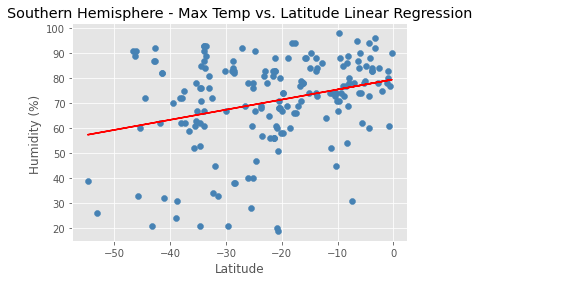

In [89]:
#Linear regression model
df = south_df
x_values = df['Lat']
y_values = df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.style.use('ggplot')  
plt.scatter(x_values,y_values, color='steelblue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%) ')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06724288483821396


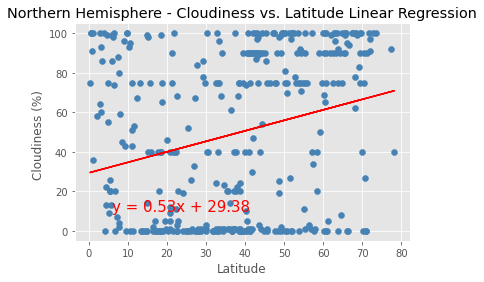

In [90]:
#Linear regression model
df = north_df
x_values = df['Lat']
y_values = df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.style.use('ggplot')  
plt.scatter(x_values,y_values, color='steelblue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%) ')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.09604676833559508


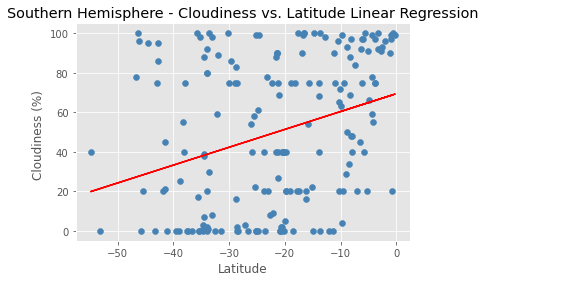

In [91]:
#Linear regression model
df = south_df
x_values = df['Lat']
y_values = df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.style.use('ggplot')  
plt.scatter(x_values,y_values, color='steelblue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%) ')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03676854904734996


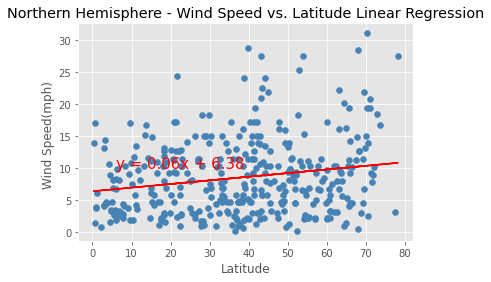

In [92]:
#Linear regression model
df = north_df
x_values = df['Lat']
y_values = df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.style.use('ggplot')  
plt.scatter(x_values,y_values, color='steelblue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph) ')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07844419533443119


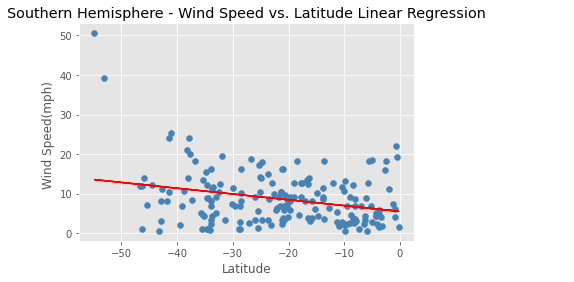

In [93]:
#Linear regression model
df = south_df
x_values = df['Lat']
y_values = df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.style.use('ggplot')  
plt.scatter(x_values,y_values, color='steelblue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph) ')
print(f"The r-squared is: {rvalue**2}")
plt.show()